In [1]:
### import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### 读取数据
df = pd.read_csv('C:/Users/Yan3/Desktop/dataset/pm2.5/pollution.csv',index_col=0)
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [3]:
values = df.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

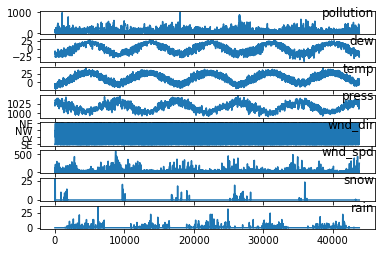

In [4]:
# 一共有8个特征
groups=[0,1,2,3,4,5,6,7]
i=1
plt.figure()
for group in groups:
    # 8行1列,第i个
    plt.subplot(8,1,i)
    # 原始特征values中的group列可视化
    plt.plot(values[:,group])
    plt.title(df.columns[group],y=0.5, loc='right')
    i=i+1
plt.show()
    

In [5]:
df['wnd_dir'].value_counts()

SE    15290
NW    14130
cv     9384
NE     4996
Name: wnd_dir, dtype: int64

In [6]:
### 将分类特征wnd_dir进行标签编码
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
values[:,4]= encoder.fit_transform(values[:,4])
#设置数据类型为float32
values = values.astype('float32')
values

array([[129.  , -16.  ,  -4.  , ...,   1.79,   0.  ,   0.  ],
       [148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
       [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
       ...,
       [ 10.  , -22.  ,  -3.  , ..., 242.7 ,   0.  ,   0.  ],
       [  8.  , -22.  ,  -4.  , ..., 246.72,   0.  ,   0.  ],
       [ 12.  , -21.  ,  -3.  , ..., 249.85,   0.  ,   0.  ]],
      dtype=float32)

In [7]:
### 0-1规范化,统一维度
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled.shape

(43800, 8)

In [8]:
# 将时间序列数据转换为适用于监督学习的数据
'''
data: 观察序列
n_in:观察数据input(x)的步长,范围[1,len(data)],默认为1
n_in:观察数据input(x)的步长,范围[1,len(data)],默认为1
n_out: output(y)的步长,默认为1
dropnan: 是否删除nan行
返回值:适用于监督学习的dataframe
'''

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # 预测序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # 去掉NaN行
    if dropnan:
        agg.dropna(inplace=True)
    return agg



In [9]:
# 将时间序列数据转换为适合监督学习的数据
reframed = series_to_supervised(scaled, 1, 1)
reframed.to_csv('C:/Users/Yan3/Desktop/dataset/pm2.5/reframed-1.csv')
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048,0.264706,0.245902,0.781818,0.333333,0.420866,0.000000,0.0


In [10]:
# 去掉不需要预测的列，即var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.to_csv('C:/Users/Yan3/Desktop/dataset/pm2.5/reframed-2.csv')
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658
...,...,...,...,...,...,...,...,...,...
43795,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048
43796,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060
43797,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060
43798,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048


In [11]:
### 数据集切分:80%作为训练集,20#作为测试集
values = reframed.values
### LSTM不能用train_test_split,因为时间序列不连续
### XGboost可以,因为样本是相互独立
n_train_hours = int(len(values)*0.8)
## :n_train_hours代表前:n_train_hours行,后面:代表所有列
train = values[:n_train_hours, :]
## n_train_hours:代表从开始n_train_hours开始后的所有行
test = values[n_train_hours:, :]

# :-1 表示从0到数组最后一位, -1代表数组最后一位
train_X,train_y = train[:, :-1],train[:, -1]
test_X,test_y = test[:, :-1], test[:, -1]
train_X.shape

(35039, 8)

In [12]:
train_y.shape

(35039,)

In [13]:
### 转化为3D格式[样本数,时间步,特征数]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1,test_X.shape[1]))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

### 设置网络模型
model = Sequential()
model.add(LSTM(50,input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dense(1)) ###因为只需要一个输出结果PM2.5
model.compile(optimizer='adam',loss='mse') ##因为我们现在在做回归,所以用MSE
### 模型训练
result = model.fit(train_X, train_y, epochs=10, batch_size = 64, 
          validation_data=(test_X, test_y),verbose=2,shuffle=False)

Epoch 1/10
548/548 - 1s - loss: 0.0037 - val_loss: 0.0094
Epoch 2/10
548/548 - 1s - loss: 9.6824e-04 - val_loss: 0.0038
Epoch 3/10
548/548 - 1s - loss: 8.2945e-04 - val_loss: 0.0022
Epoch 4/10
548/548 - 1s - loss: 8.0445e-04 - val_loss: 0.0017
Epoch 5/10
548/548 - 1s - loss: 7.9945e-04 - val_loss: 0.0015
Epoch 6/10
548/548 - 1s - loss: 7.9848e-04 - val_loss: 0.0014
Epoch 7/10
548/548 - 1s - loss: 7.9835e-04 - val_loss: 0.0013
Epoch 8/10
548/548 - 1s - loss: 7.9850e-04 - val_loss: 0.0012
Epoch 9/10
548/548 - 1s - loss: 7.9839e-04 - val_loss: 0.0012
Epoch 10/10
548/548 - 1s - loss: 7.9797e-04 - val_loss: 0.0012


In [15]:
### 模型预测
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
test_predict

array([[0.03062624],
       [0.03144234],
       [0.05630703],
       ...,
       [0.0143932 ],
       [0.01435501],
       [0.01267883]], dtype=float32)

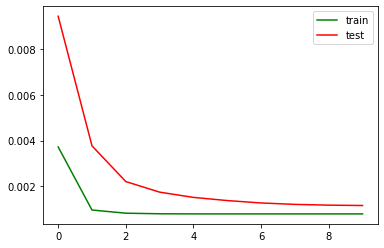

In [16]:
### 画训练损失和历史损失
line1 = result.history['loss']
line2 = result.history['val_loss']
plt.plot(line1, label='train',c ='g')
plt.plot(line2, label='test',c ='r')
plt.legend(loc='best')
plt.show()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                11800     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


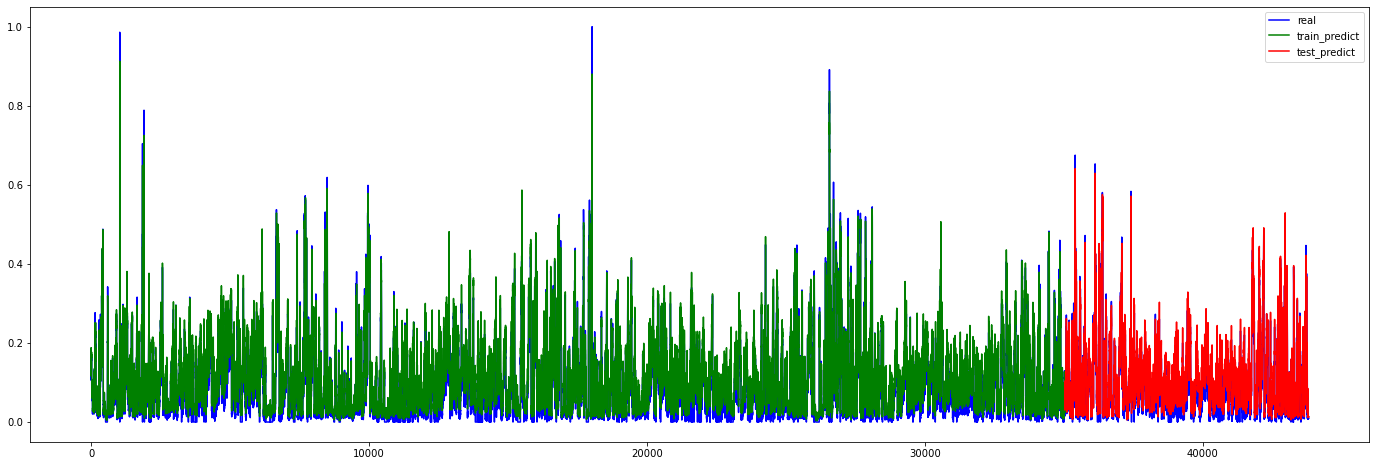

In [23]:
### 呈现原始数据,训练结果,预测结果
def plot_img(source_data_set, train_predict,  test_predict):
    plt.figure(figsize=(24, 8))
    plt.plot(source_data_set[:, -1], c='b',label='real')
    plt.plot([x for x in train_predict], c='g',label='train_predict')
    plt.plot([None for _ in train_predict]  + [x for x in test_predict], 
             c='r',label='test_predict')
    plt.legend(loc='best')
    plt.show()
### 绘制预测结果与实际结果对比    
plot_img(values,train_predict, test_predict)